### GRIP @ The Sparks Foundation

# Author - Kavya V

### Task 1 - Prediction Using Supervised Machine Learning

#### In this task I have predicted the percentage of marks that a student is expected to score based upon the number of hours they studied

#### This is a simple linear regression task as it involves just two variables.

In [101]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Loading Data into Python Environment

In [102]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 2 - Descriptive Statistics

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [104]:
data.shape

(25, 2)

In [105]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [106]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [107]:
data.nunique()

Hours     23
Scores    23
dtype: int64

In [108]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There are no missing values in the dataset.

### Step 3 - Visualizing the Data

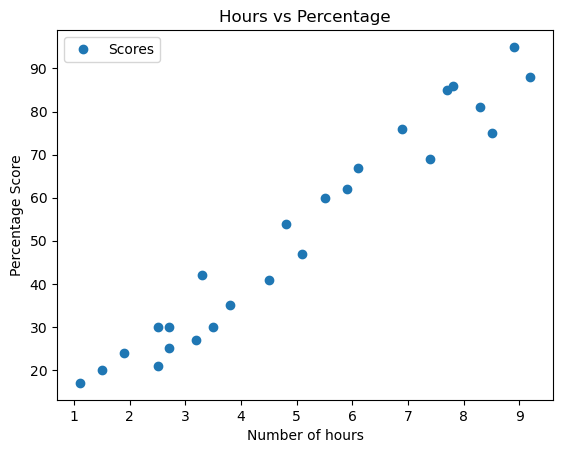

In [109]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of hours')  
plt.ylabel('Percentage Score')  
plt.show()

#### Observation- Number of hours studied is linearly related to scores of the student

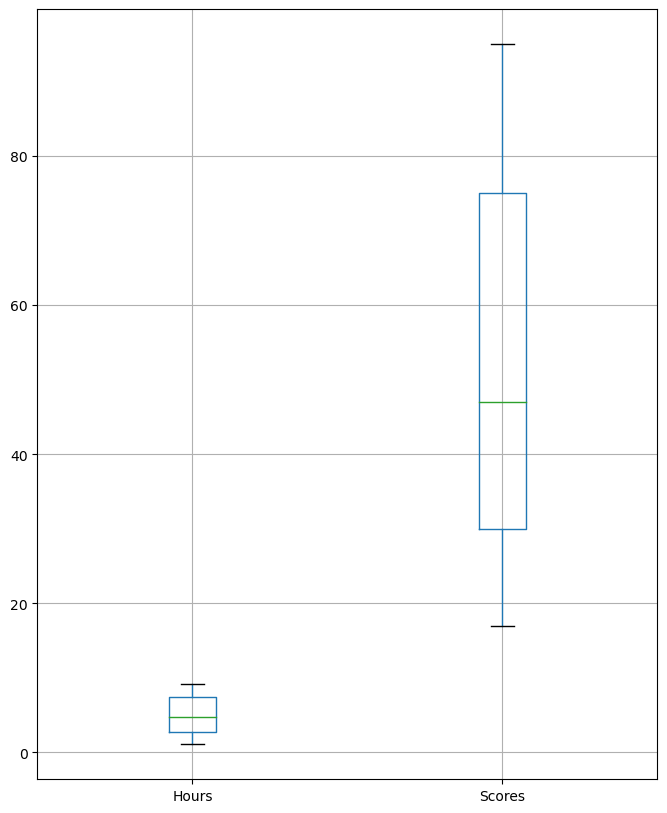

In [110]:
# Checking Outliers using boxplot
data.boxplot(figsize=(8,10))
plt.show()

#### No outliers are present in the data

### Step 4 - Preparing the Data

In [111]:
# Split data into features and target
y = data['Scores']
x = data.drop('Scores',axis = 1)

### Step 5 - Model Building 

In [112]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Splitting data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 

In [113]:
#Creating an instance of the LinearRegression
lr = LinearRegression()

#Creating the model
model = lr.fit(x_train,y_train)

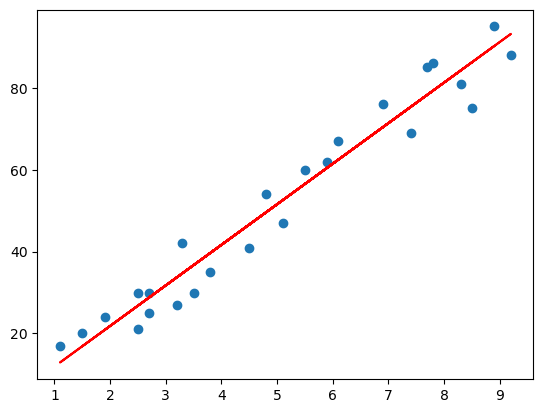

In [114]:
# Plotting the regression line
line = lr.coef_*x+ lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color ='red');
plt.show()

### Step 6 - Making Predictions

In [115]:
y_pred = model.predict(x_test)

In [116]:
# Comparing Actual vs Predicted
data["predicted_scores"]=model.predict(data[['Hours']])
data

,Hours,Scores,predicted_scores
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458
5,1.5,20,16.884145
6,9.2,88,93.196200
7,5.5,60,56.526771
8,8.3,81,84.276609
9,2.7,25,28.776933


In [119]:
# Testing the model with our own data
own_pred = model.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 93.69173248737539


### Step 7 - Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different 
algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [118]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.